In [48]:
import numpy as np
import re
import string
import pandas as pd
import nltk

In [49]:
data = pd.read_csv('train.csv',encoding = "ISO-8859-1")
data = data.loc[:,['id','label','tweet']]
data.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(31962, 3)

In [50]:
dt = []
for i in range(len(data['tweet'])):
    input_txt = data['tweet'][i]
    r = re.findall("@[\w]*",data['tweet'][i])
    for sen in r:
            input_txt = re.sub(sen,'',data['tweet'][i])
    dt.append(input_txt)
data['clean'] = dt

In [51]:
data['clean'] = data['clean'].str.replace("[^a-zA-Z#]", " ")

In [52]:
data.head()

,id,label,tweet,clean
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,birthday your majesty,birthday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [53]:
def tokenise (data_element):
    tokenized_data = data_element.apply(lambda x: x.split())
    return tokenized_data


def join(tokenized_data):
    joined_data = ''
    for i in range(len(tokenized_data)):
        joined_data = joined_data+(tokenized_data[i])
        joined_data = joined_data + ' '
    return joined_data


In [54]:
#from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenise(data['clean'])

dtwt=[]
for token in tokenized_tweet  :
    clean_token=[]
    for i in token:
        if i not in stopwords.words('english') and (len(i)>3):
            #clean_token.append(stemmer.stem(i))
            clean_token.append(lemmatizer.lemmatize(i))
    dtwt.append(join(clean_token))
  

In [55]:
data.clean = dtwt

In [56]:
from wordcloud import WordCloud

In [57]:
import matplotlib.pyplot as plt

In [58]:
import matplotlib.cm as cmp 

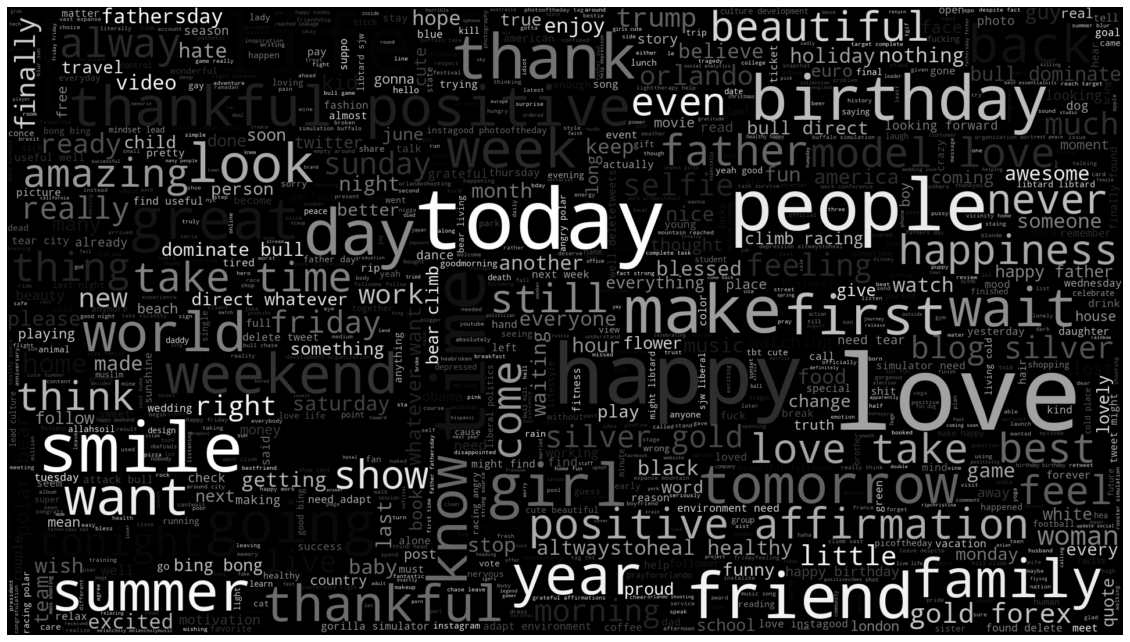

In [59]:
word = ' '.join([text for text in data['clean']])

wc = WordCloud(background_color='black',
               colormap=cmp.gist_gray,
               width=1920,
               height=1080,
               random_state=21,
               max_words=1000,
               max_font_size=180).generate(word)

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

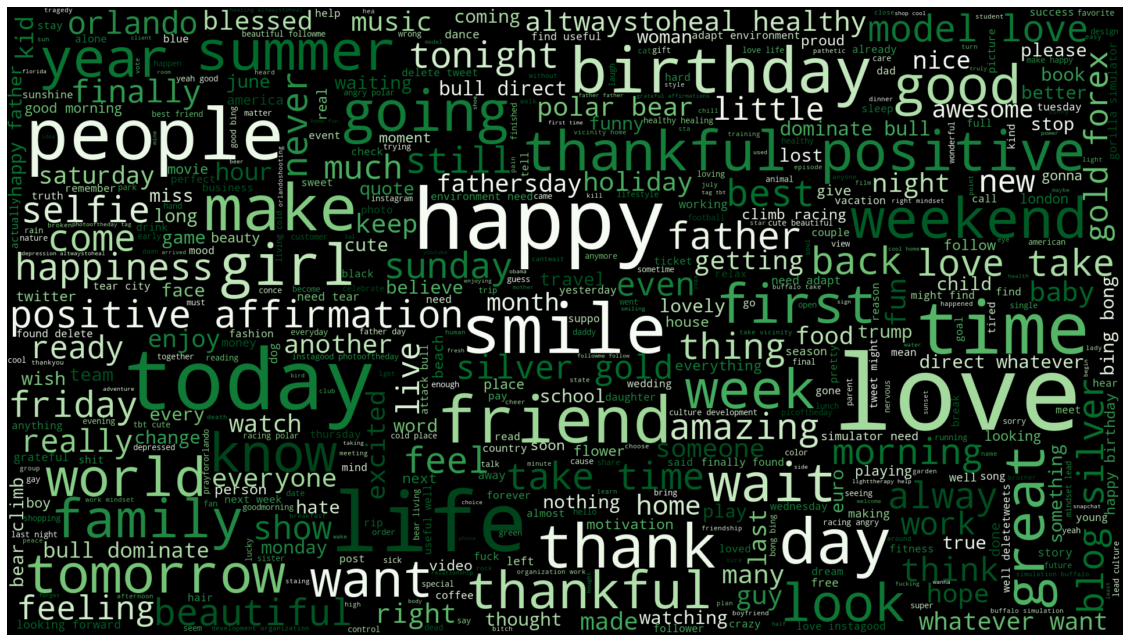

In [60]:
pwords = ' '.join([text for text in data['clean'][data['label'] == 0]])


wcp= WordCloud(background_color='black',
               colormap=cmp.Greens_r,
               width=1920,
               height=1080,
               random_state=21,
               max_words=500,
               max_font_size=180).generate(pwords)

plt.figure(figsize=(20, 20))
plt.imshow(wcp, interpolation="bilinear")
plt.axis('off')
plt.show()

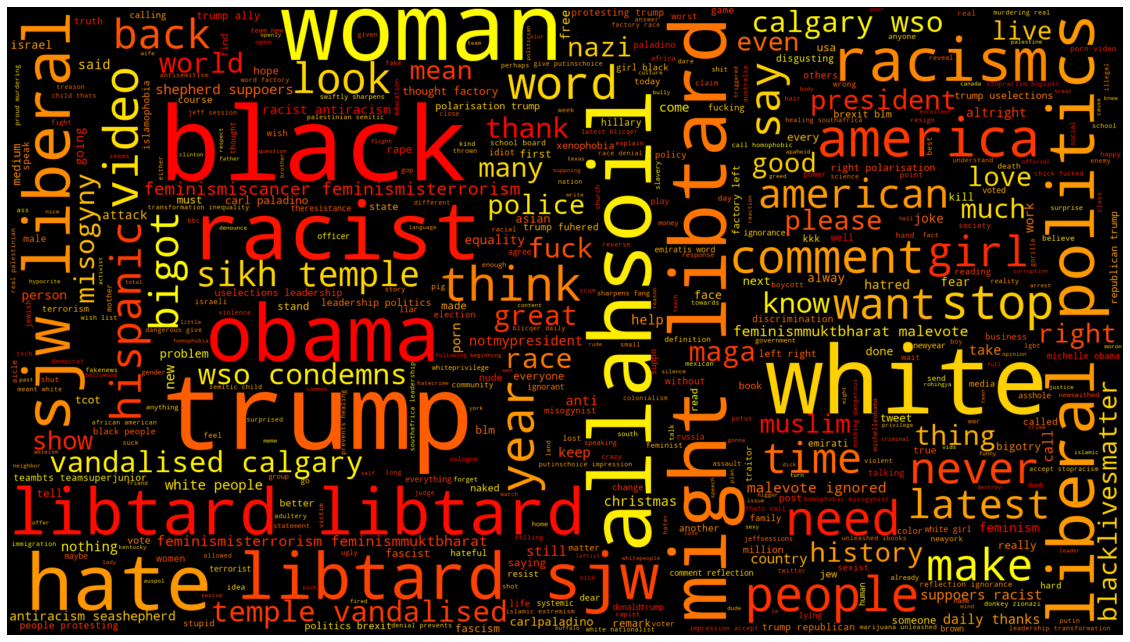

In [61]:
nwords = ' '.join([text for text in data['clean'][data['label'] == 1]])

wcn= WordCloud(background_color='black',
               colormap=cmp.autumn_r,
               width=1920,height=1080,
               random_state=21,
               max_words=500,
               max_font_size=180).generate(nwords)

plt.figure(figsize=(20, 20))
plt.imshow(wcn, interpolation="bilinear")
plt.axis('off')
plt.show()

In [62]:
import seaborn as sb


In [63]:
def hasht(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [64]:
h_regular = hasht(data['clean'][data['label'] == 0])
h_negative = hasht(data['clean'][data['label'] == 1])

In [65]:
h_regular = sum(h_regular,[])
h_negative = sum(h_negative,[])

In [66]:
freg = nltk.FreqDist(h_regular)
f_reg = pd.DataFrame({'Words': list(freg.keys()),
                  'Count': list(freg.values())})
fneg = nltk.FreqDist(h_negative)
f_neg = pd.DataFrame({'Words': list(fneg.keys()),
                  'Count': list(fneg.values())})

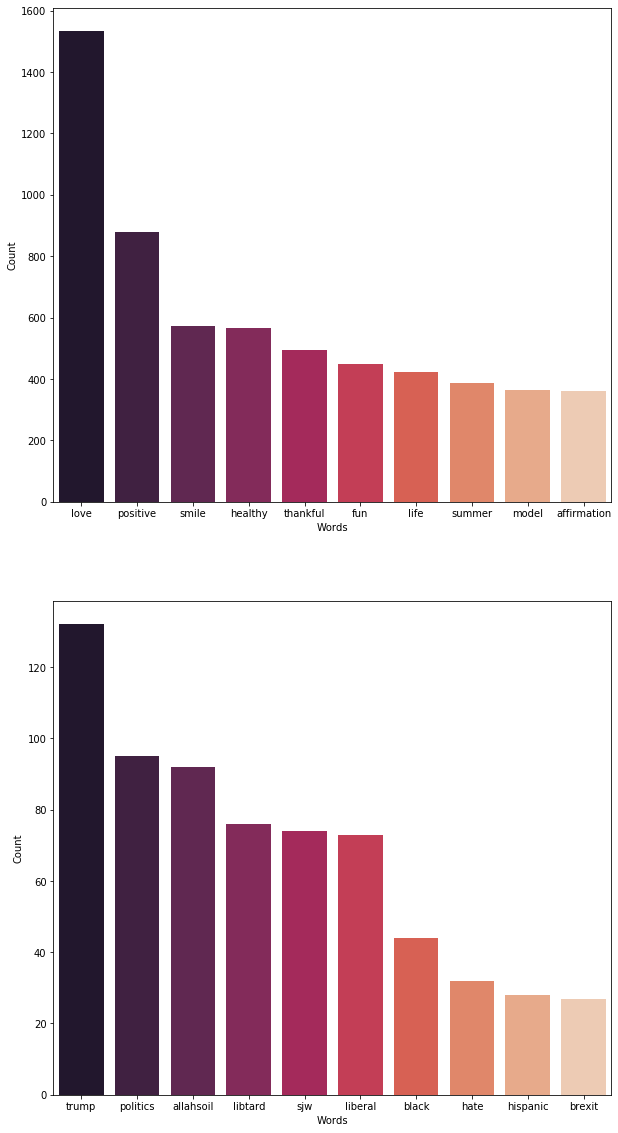

In [67]:
f_reg = f_reg.nlargest(columns="Count", n = 10) 
f_neg = f_neg.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
rx = sb.barplot(data=f_reg, x= "Words", y = "Count",palette='rocket')
rx.set(ylabel = 'Count')
plt.subplot(2,1,2)
nx = sb.barplot(data=f_neg, x= "Words", y = "Count",palette='rocket')
nx.set(ylabel = 'Count')
plt.show()

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [73]:
vect_tf = tfidf.fit_transform(data['clean'])

In [76]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr = LogisticRegression()

In [81]:
classifier.fit(x_train_bag,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
y_pred = classifier.predict(x_test_bag)

In [83]:
from sklearn.metrics import f1_score,classification_report

In [84]:
print(classification_report(y_test,y_pred))
#f1_score(y_test,y_pred)*100

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7460
           1       0.74      0.35      0.48       531

    accuracy                           0.95      7991
   macro avg       0.85      0.67      0.73      7991
weighted avg       0.94      0.95      0.94      7991



In [85]:
classifier.fit(x_train_vect,y_train)
y_pred = classifier.predict(x_test_vect)
f1_score(y_test,y_pred)*100

45.84450402144771

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clas = RandomForestClassifier(n_estimators=100,random_state=0)

In [88]:
clas.fit(x_train_bag,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [89]:
y_pred = clas.predict(x_test_bag)

In [90]:
f1_score(y_test,y_pred)*100

51.8450184501845

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7460
           1       0.51      0.53      0.52       531

    accuracy                           0.93      7991
   macro avg       0.74      0.75      0.74      7991
weighted avg       0.94      0.93      0.94      7991

